<a href="https://colab.research.google.com/github/nahbos/AUT-Fundamental-Statistical-Learning/blob/main/Ex01/ex01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sobhan Moradian Daghigh

- 11-22-2022

### Ex-*01*

In [101]:
import numpy as np
from matplotlib import pyplot as plt
import random
from matplotlib_venn import venn3, venn3_circles
from scipy.stats import norm, cauchy

In [2]:
def plotter(data):
    with plt.style.context('seaborn'):
        plt.figure(figsize=(10, 5))
        plt.plot(data)
        plt.show()

# Q1

In [3]:
def coin_flip_simulator(p, n=1000):
    proportion = []
    for i in range(1, n + 1):
        proportion.append(np.random.binomial(n=i, p=p) / i)
    return proportion

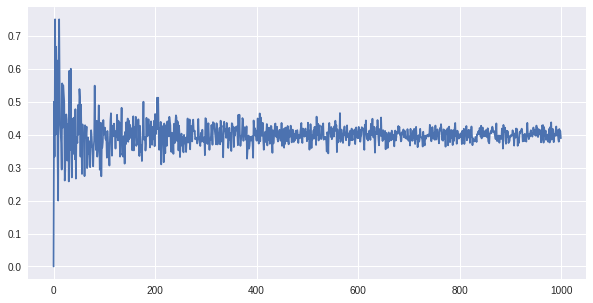

In [4]:
p = 0.4
n = 1000
proportions = coin_flip_simulator(p=p, n=n)
plotter(proportions)

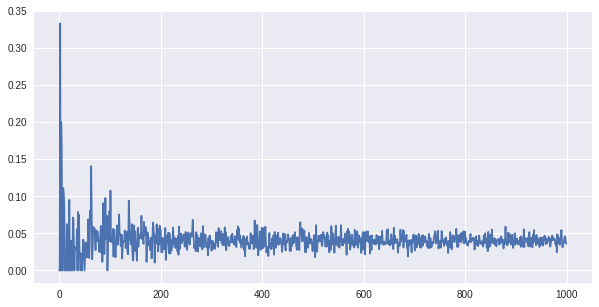

In [5]:
p = 0.04
n = 1000
proportions2 = coin_flip_simulator(p=p, n=n)
plotter(proportions2)

# Q2

In [6]:
def heads_estimator(p, n):
    return np.average(np.random.binomial(n=n, p=p, size=10000))

In [7]:
p = 0.4
estimations = []
for n in [10, 100, 1000]:
    estimations.append(heads_estimator(p=p, n=n))
print('X for n = 10   : {:.2f}'.format(estimations[0]))
print('X for n = 100  : {:.2f}'.format(estimations[1]))
print('X for n = 1000 : {:.2f}'.format(estimations[2]))

X for n = 10   : 4.01
X for n = 100  : 40.01
X for n = 1000 : 399.94


# Q3

In [8]:
A = [2, 3, 6]
B = [1, 2, 3, 4]
epoch = 1000

In [9]:
def rolling_dice(number):
    counts = [0] * 6
    for i in range(number):
        roll = random.randint(1, 6)
        counts[roll - 1] += 1
    return counts

In [10]:
def check_events(event, A, B, epoch):
    AB = np.intersect1d(A, B)
    temp_a = 0
    temp_b = 0
    temp_ab = 0
    for i, ele in enumerate(event):
        if (i + 1) in A:
            temp_a += ele
        if (i + 1) in B:
            temp_b += ele
        if (i + 1) in AB:
            temp_ab += ele
    return np.divide([temp_a, temp_b, temp_ab], epoch)

In [11]:
def venn_drwer(A, B):
    plt.figure(figsize=(10, 5))
    A = set(A)
    B = set(B)
    C = set([])
    v = venn3(subsets = [A, B, C], set_labels = ('A', 'B'))
    v.get_label_by_id('100').set_text('\n\n'.join(map(str,A-B)))
    if A&B:
        v.get_label_by_id('110').set_text('\n\n'.join(map(str,A&B)))
    v.get_label_by_id('010').set_text('\n\n'.join(map(str,B-A)))
    venn3_circles(subsets = [A, B, C], linestyle='dashed', linewidth=2, color='k')
    plt.show()

In [12]:
event = rolling_dice(epoch)
event

[166, 145, 177, 157, 188, 167]

In [13]:
p_a, p_b, p_ab = check_events(event, A, B, epoch)
print('P(A)  = {} |'.format(p_a))
print('P(B)  = {} |   >  P(A) * P(B) = {:.3f}'.format(p_b, p_a * p_b))
print('P(AB) = {}'.format(p_ab))

P(A)  = 0.489 |
P(B)  = 0.645 |   >  P(A) * P(B) = 0.315
P(AB) = 0.322


/usr/local/lib/python3.7/dist-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


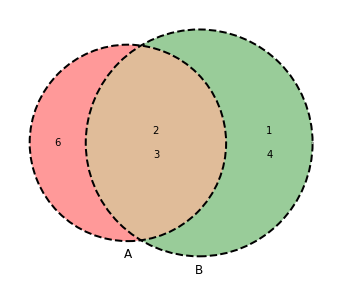

In [14]:
venn_drwer(A, B)

In [15]:
disj_A = [1, 2, 3]
disj_B = [4, 5, 6]
event = rolling_dice(epoch)
p_a, p_b, p_ab = check_events(event, disj_A, disj_B, epoch)
print('P(A)  = {} |'.format(p_a))
print('P(B)  = {} |   >  P(A) * P(B) = {:.3f}'.format(p_b, p_a * p_b))
print('P(AB) = {}'.format(p_ab))

P(A)  = 0.473 |
P(B)  = 0.527 |   >  P(A) * P(B) = 0.249
P(AB) = 0.0


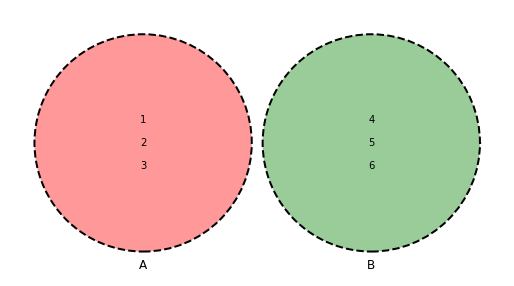

In [16]:
venn_drwer(disj_A, disj_B)

# Q4

In [17]:
def monty_hall_decision(change_door=True):
  
    doors = ['goat', 'car', 'goat']
    np.random.shuffle(doors)
    
    choice1 = random.randint(0, 2)
    
    options = list(set([0, 1, 2]) - set([choice1]))
    options_to_show = []
    for i in options:
        if doors[i] == 'goat':
            options_to_show.append(i)

    show = options_to_show[random.randint(0, len(options_to_show) - 1)]

    opt = list(set([0, 1, 2]) - set([choice1, show]))[0]
    if change_door:
        return 1 if doors[opt] == 'car' else 0
    else: 
        return 1 if doors[choice1] == 'car' else 0

In [18]:
# Condition 1: 1000 rounds with changing decision
condition1 = sum([monty_hall_decision(change_door=True) for _ in range(1000)])

# Condition 2: 1000 rounds without changing decision
condition2 = sum([monty_hall_decision(change_door=False) for _ in range(1000)])

print('Condition one probability: {}'.format(condition1 / 1000))
print('Condition two probability: {}'.format(condition2 / 1000))

Condition one probability: 0.675
Condition two probability: 0.338


# Q5

In [19]:
def drawer(x, condition, mean, sigma):
    plt.figure(figsize=(10, 5))
    with plt.style.context('seaborn'):
        y = norm.pdf(x, mean, sigma)
        z = x[condition]
        plt.plot(x, y)
        plt.fill_between(z, 0, norm.pdf(z, mean, sigma))
        plt.show()

In [20]:
def cdf_prob(mean, sigma, x, operator='greater'):
    p = 1 - norm.cdf(x, mean, sigma) if operator == 'greater' else norm.cdf(x, mean, sigma)
    return round(p, 3)

In [21]:
mean = 5
sigma = np.sqrt(18)

## a.

In [22]:
cdf_prob(mean=mean, sigma=sigma, x=9, operator='less')

0.827

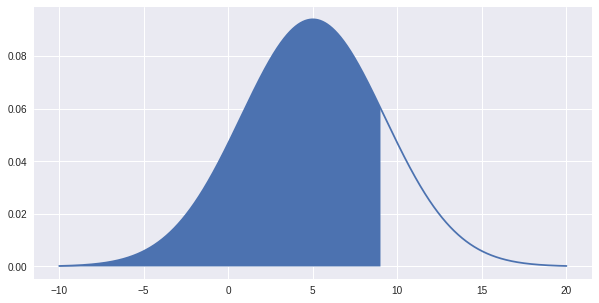

In [23]:
x = np.arange(-10, 20, 0.001)
drawer(x=x, condition=x<9, mean=mean, sigma=sigma)

## b.

In [24]:
cdf_prob(mean=mean, sigma=sigma, x=-3, operator='greater')

0.97

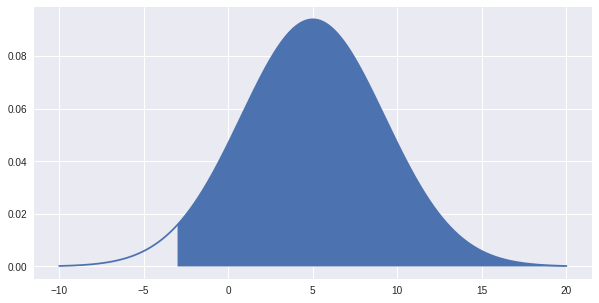

In [25]:
drawer(x=x, condition=x>-3, mean=mean, sigma=sigma)

## c.

In [26]:
def inverse_cdf_iterator(mean, sigma, p, operator='greater'):
    if operator == 'greater':
        x = norm.ppf(1 - p, loc=mean, scale=sigma)
    else:
        x = norm.ppf(p, loc=mean, scale=sigma)
    return round(x, 3)

In [44]:
inverse_cdf_iterator(mean=mean, sigma=sigma, p=0.05, operator='greater')

11.979

## d.

In [48]:
# P(X < 0)
p1 = cdf_prob(mean=mean, sigma=sigma, x=0, operator='less')

# P(X < 4)
p2 = cdf_prob(mean=mean, sigma=sigma, x=4, operator='less')

np.abs(round(p2 - p1, 3))

0.288

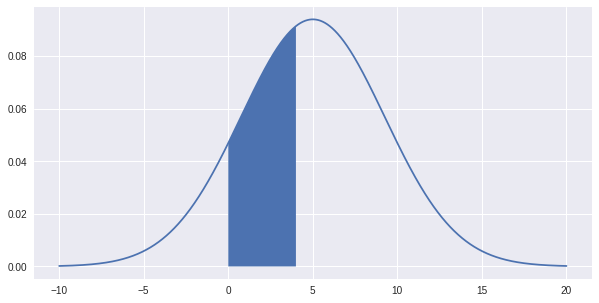

In [49]:
drawer(x=x, condition=(x>0) & (x<4), mean=mean, sigma=sigma)

## e.

In [63]:
x = inverse_cdf_iterator(mean=mean, sigma=sigma, p=0.975, operator='less')
round(x, 3)

13.315

# Q6

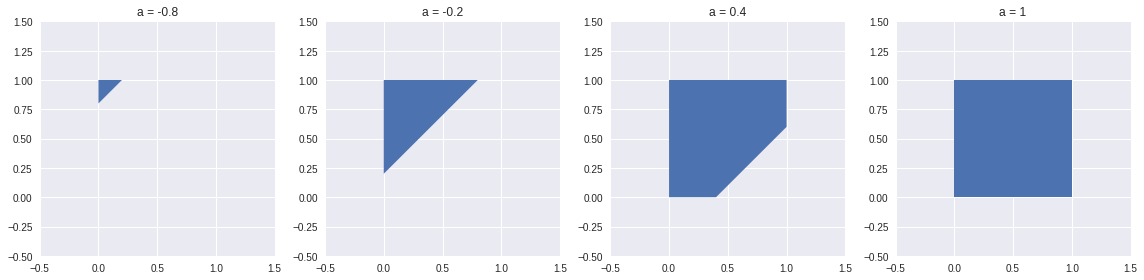

In [98]:
plt.figure(figsize=(16, 4))
with plt.style.context('seaborn'):
    ax = plt.subplot(1, 4, 1)
    a = -0.8
    x = [0, 1+a, 0]
    y = [1, 1, -a]
    ax.fill(x, y)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title('a = -0.8')

    ax = plt.subplot(1, 4, 2)
    a = -0.2
    x = [0, 1 + a, 0]
    y = [1, 1, -a]
    ax.fill(x, y)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title('a = -0.2')

    ax = plt.subplot(1, 4, 3)
    a = 0.4
    x = [0, a, 1, 1, 0]
    y = [0, 0, 1 - a, 1, 1]
    ax.fill(x, y)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title('a = 0.4')

    ax = plt.subplot(1, 4, 4)
    a = 1
    x = [0, a, 1, 1, 0]
    y = [0, 0, 1 - a, 1, 1]
    ax.fill(x, y)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title('a = 1')


    plt.tight_layout()
    plt.show()

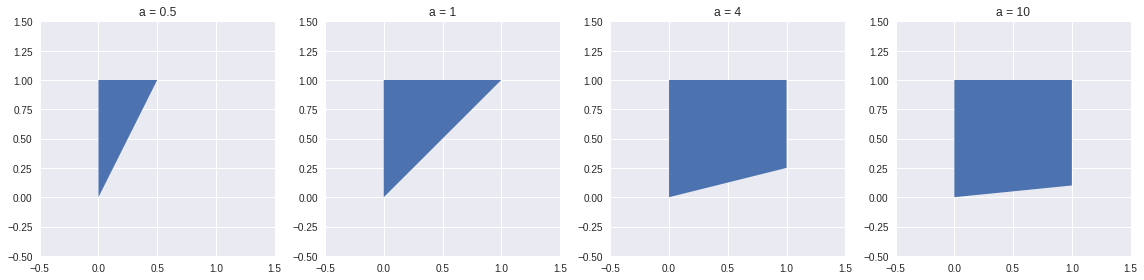

In [99]:
plt.figure(figsize=(16, 4))
with plt.style.context('seaborn'):
    ax = plt.subplot(1, 4, 1)
    a = 0.5
    x = [0, a, 0]
    y = [0, 1, 1]
    ax.fill(x, y)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title('a = 0.5')

    ax = plt.subplot(1, 4, 2)
    a = 1
    x = [0, a, 0]
    y = [0, 1, 1]
    ax.fill(x, y)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title('a = 1')

    ax = plt.subplot(1, 4, 3)
    a = 4
    x = [0, 1, 1, 0]
    y = [0, 1/a, 1, 1]
    ax.fill(x, y)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title('a = 4')

    ax = plt.subplot(1, 4, 4)
    a = 10
    x = [0, 1, 1, 0]
    y = [0, 1/a, 1, 1]
    ax.fill(x, y)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title('a = 10')


    plt.tight_layout()
    plt.show()

# Q7

# Q8

# Q9

In [109]:
np.random.binomial(n=5, p=0.1)

1

# Q10

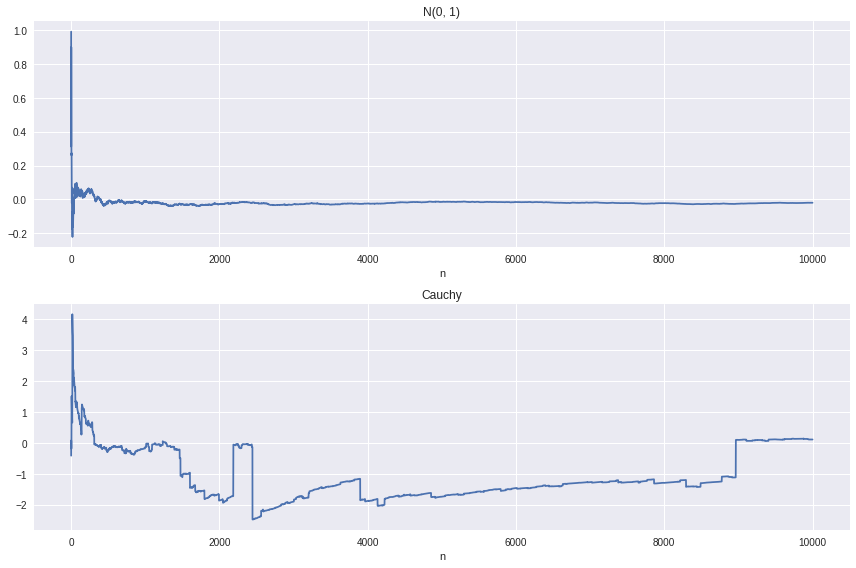

In [104]:
N = 10000
X = norm.rvs(size=N)
Y = cauchy.rvs(size=N)

nn = np.arange(1, N + 1)

plt.figure(figsize=(12, 8))
with plt.style.context('seaborn'):
    ax = plt.subplot(2, 1, 1)
    ax.plot(nn, np.cumsum(X) / nn)
    ax.set_title('N(0, 1)')
    ax.set_xlabel('n')

    ax = plt.subplot(2, 1, 2)
    ax.plot(nn, np.cumsum(Y) / nn)
    ax.set_title('Cauchy')
    ax.set_xlabel('n')

    plt.tight_layout()
    plt.show()

# Q11

# Q12

Finito